# IA

## Case study in the use of Box-Jenkins modeling with aerosol particle size data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_excel("D:/labs/TSA/TSA_IA2.xlsx")
df

,data
0,115.36539
1,114.63150
2,114.63150
3,116.09940
4,116.34400
...,...
554,112.67420
555,112.18491
556,112.91890
557,112.42960


### Model Identification

#### 1) Run Sequence Plot

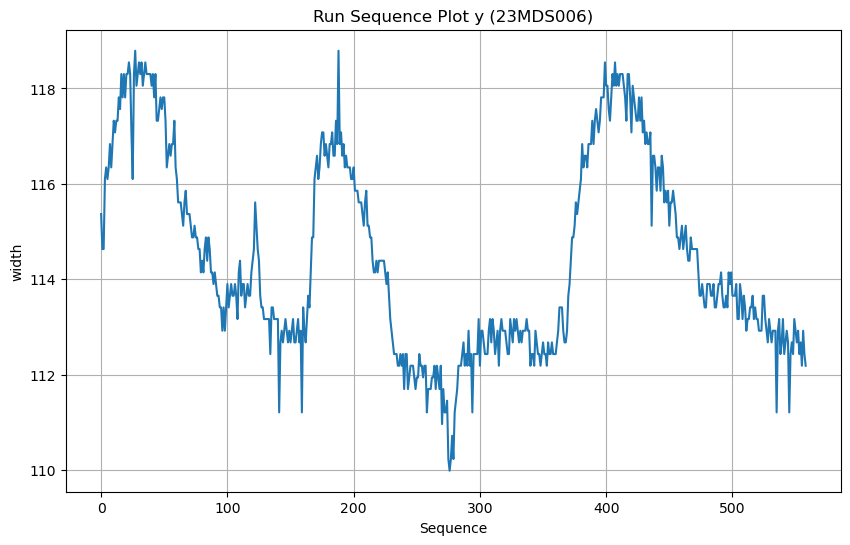

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Run Sequence Plot y (23MDS006)')
plt.xlabel('Sequence')
plt.ylabel('width')
plt.grid(True)
plt.show()

Interpretation :

1. the data will be mostly positively correlated
2. as graph will up and down their will be not any trends and seasonal cycle

#### 2) Autocorrelation Plot

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1500x600 with 0 Axes>

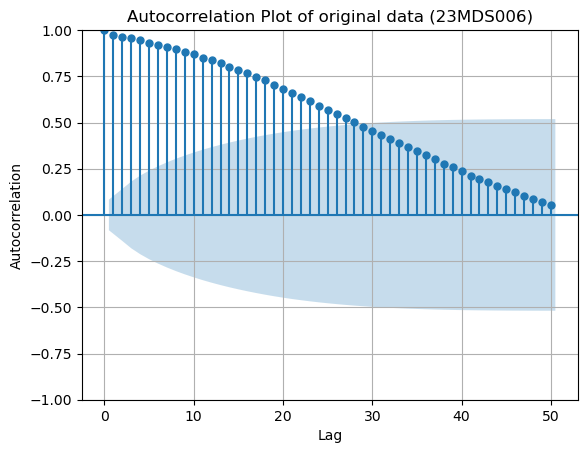

In [56]:
plt.figure(figsize=(15, 6))
plot_acf(df, lags=50)
plt.title('Autocorrelation Plot of original data (23MDS006)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Interpretation : the autocorrelation will decreasing slowly so it will be positive. The plot shows non-stationary point.

#### 3) Run Sequence Plot of Differenced Data

In [57]:
differenced_data = np.diff(df['data'])

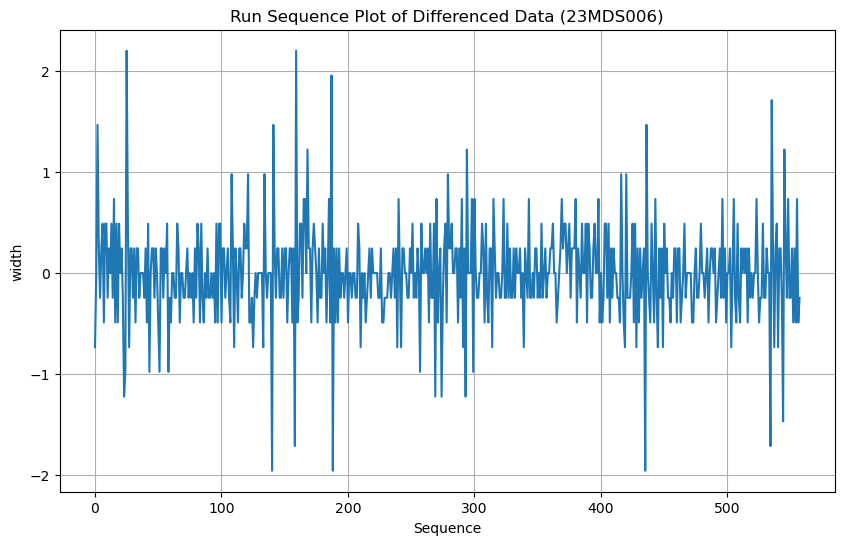

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(differenced_data)
plt.title('Run Sequence Plot of Differenced Data (23MDS006)')
plt.xlabel('Sequence')
plt.ylabel('width')
plt.grid(True)
plt.show()

Interpretation :
The differenced data were less autocorrelated than the original data.


#### 4) Autocorrelation Plot of the Differenced Data

<Figure size 1000x600 with 0 Axes>

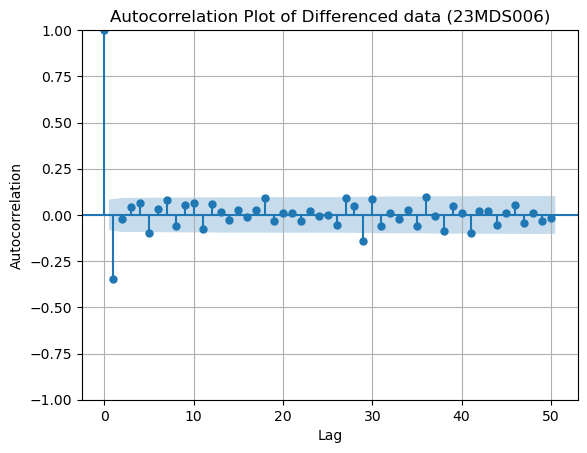

In [59]:
plt.figure(figsize=(10, 6))
plot_acf(differenced_data, lags=50)
plt.title('Autocorrelation Plot of Differenced data (23MDS006)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Interpretation : The autocorrelation plot and run sequence of the differenced data indicate that the differenced data are stationary.

#### 5) Partial Autocorrelation Plot of the Differenced Data

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf

<Figure size 1000x600 with 0 Axes>

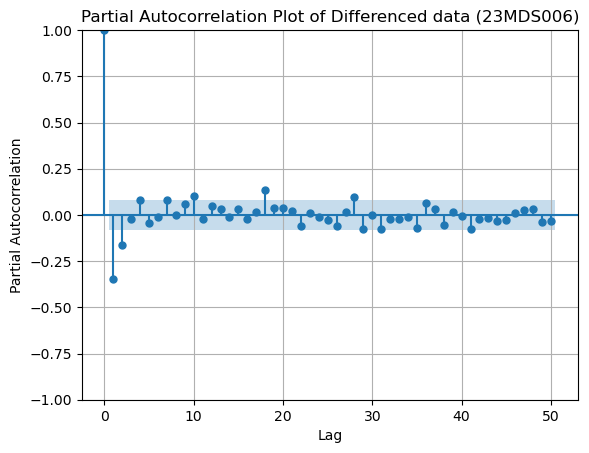

In [61]:
plt.figure(figsize=(10, 6))
plot_pacf(differenced_data, lags=50)
plt.title('Partial Autocorrelation Plot of Differenced data (23MDS006)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

Interpretation : indicates that only the partial autocorrelations of the first and second lags are important.

### Model Estimation


#### 1) AR(2) Model Parameter Estimates

In [66]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.tsa.ar_model import AutoReg
from tabulate import tabulate

In [72]:
df1 = pd.DataFrame({'data': differenced_data})

In [73]:
model = AutoReg(df1['data'], lags=2).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   data   No. Observations:                  558
Model:                     AutoReg(2)   Log Likelihood                -334.934
Method:               Conditional MLE   S.D. of innovations              0.442
Date:                Thu, 25 Apr 2024   AIC                            677.868
Time:                        10:44:12   BIC                            695.152
Sample:                             2   HQIC                           684.619
                                  558                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.019     -0.359      0.719      -0.043       0.030
data.L1       -0.4068      0.042     -9.721      0.000      -0.489      -0.325
data.L2       -0.1647      0.042     -3.941      0.0

In [74]:
intercept = model.params[0]
ar1 = model.params[1]
ar2 = model.params[2]
se_intercept = model.bse[0]
se_ar1 = model.bse[1]
se_ar2 = model.bse[2]
ci_ar1 = model.conf_int().iloc[1]
ci_ar2 = model.conf_int().iloc[2]

In [75]:
output_data = [
    ["Intercept", f"{intercept:.4f}", f"{se_intercept:.4f}", ""],
    ["AR1", f"{ar1:.4f}", f"{se_ar1:.4f}", f"({ci_ar1[0]:.4f}, {ci_ar1[1]:.4f})"],
    ["AR2", f"{ar2:.4f}", f"{se_ar2:.4f}", f"({ci_ar2[0]:.4f}, {ci_ar2[1]:.4f})"],
    ["Number of Observations:", len(df1['data']), "", ""],
    ["Degrees of Freedom:", len(df1['data']) - 3, "", ""],
    ["Residual Standard Deviation:", model.scale, "", ""]
]

table_headers = ["Source", "Estimate", "Standard Error", "95% Confidence Interval"]
print(tabulate(output_data, headers=table_headers, tablefmt="pipe"))

| Source                       |   Estimate | Standard Error   | 95% Confidence Interval   |
|:-----------------------------|-----------:|:-----------------|:--------------------------|
| Intercept                    |  -0.0067   | 0.0187           |                           |
| AR1                          |  -0.4068   | 0.0418           | (-0.4888, -0.3248)        |
| AR2                          |  -0.1647   | 0.0418           | (-0.2467, -0.0828)        |
| Number of Observations:      | 558        |                  |                           |
| Degrees of Freedom:          | 555        |                  |                           |
| Residual Standard Deviation: |   0.195327 |                  |                           |


#### 2) MA(1) Model Parameter Estimates

In [86]:
model = AutoReg(df1, lags=1).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   data   No. Observations:                  558
Model:                     AutoReg(1)   Log Likelihood                -342.864
Method:               Conditional MLE   S.D. of innovations              0.448
Date:                Thu, 25 Apr 2024   AIC                            691.728
Time:                        10:59:50   BIC                            704.695
Sample:                             1   HQIC                           696.792
                                  558                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0062      0.019     -0.328      0.743      -0.043       0.031
data.L1       -0.3477      0.040     -8.771      0.000      -0.425      -0.270
                                    Roots           

In [88]:
intercept = model.params[0]
ma1 = model.params[1]
se_intercept = model.bse[0]
se_ma1 = model.bse[1]
ci_ma1 = model.conf_int().iloc[1]
output_data = [
    ["Intercept", f"{intercept:.4f}", f"{se_intercept:.4f}", ""],
    ["MA1", f"{ma1:.4f}", f"{se_ma1:.4f}", f"({ci_ma1[0]:.4f}, {ci_ma1[1]:.4f})"],
    ["Number of Observations:", len(df1['data']), "", ""],
    ["Degrees of Freedom:", len(df1['data']) - 2, "", ""],
    ["Residual Standard Deviation:", model.scale, "", ""]
]

table_headers = ["Source", "Estimate", "Standard Error", "95% Confidence Interval"]
print(tabulate(output_data, headers=table_headers, tablefmt="pipe"))

| Source                       |   Estimate | Standard Error   | 95% Confidence Interval   |
|:-----------------------------|-----------:|:-----------------|:--------------------------|
| Intercept                    |  -0.0062   | 0.0190           |                           |
| MA1                          |  -0.3477   | 0.0396           | (-0.4254, -0.2700)        |
| Number of Observations:      | 558        |                  |                           |
| Degrees of Freedom:          | 556        |                  |                           |
| Residual Standard Deviation: |   0.200535 |                  |                           |


### Model validation

#### 1) 4-Plot of Residuals from ARIMA(2,1,0)

In [76]:
model = ARIMA(df1['data'], order=(2, 1, 0))
results = model.fit()
residuals = results.resid

In [78]:
import seaborn as sns

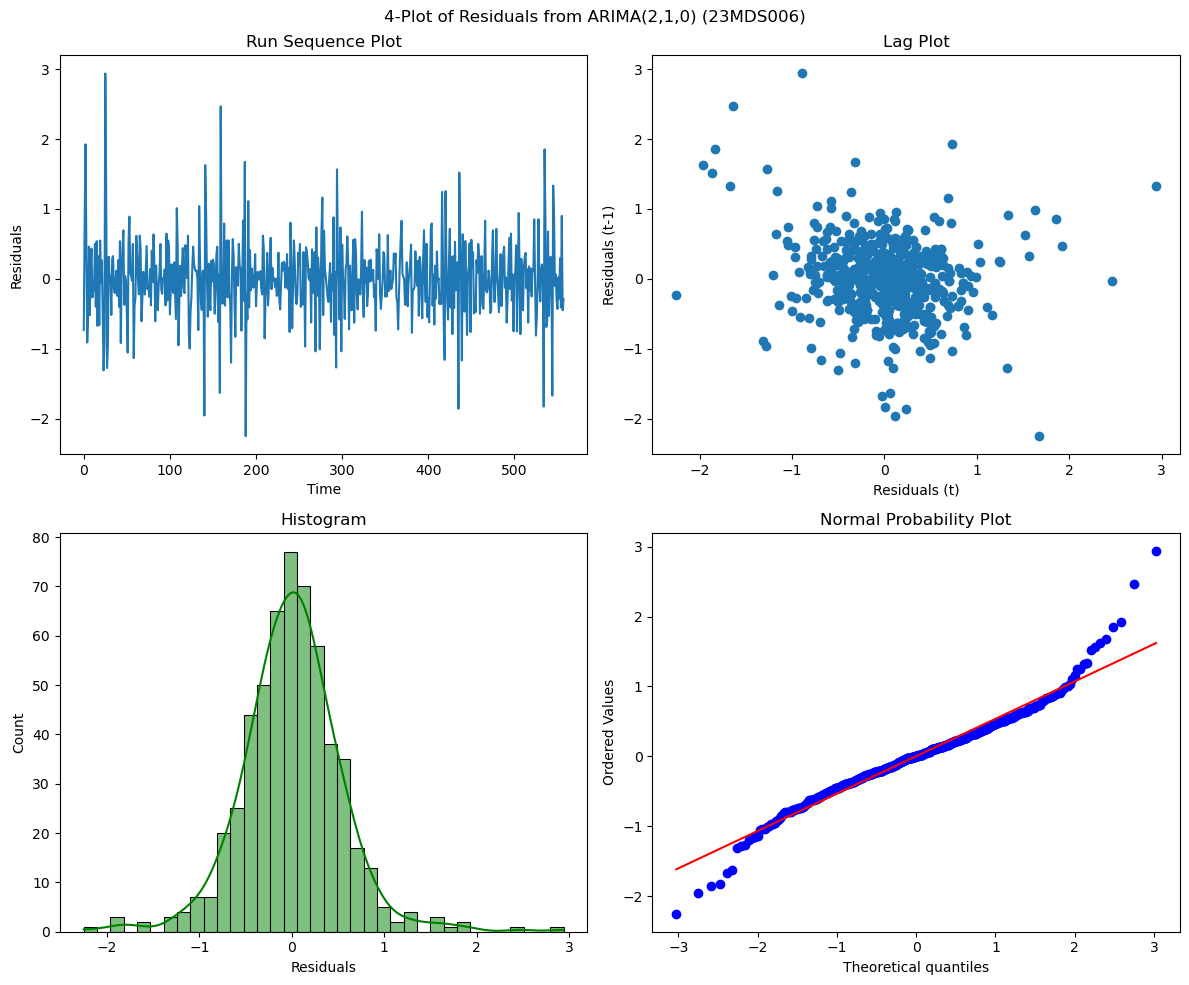

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('4-Plot of Residuals from ARIMA(2,1,0) (23MDS006)')

axs[0, 0].plot(residuals)
axs[0, 0].set_title('Run Sequence Plot')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Residuals')

pd.plotting.lag_plot(residuals, lag=1, ax=axs[0, 1])
axs[0, 1].set_title('Lag Plot')
axs[0, 1].set_xlabel('Residuals (t)')
axs[0, 1].set_ylabel('Residuals (t-1)')

sns.histplot(residuals, kde=True, ax=axs[1, 0], color = 'green')
axs[1, 0].set_title('Histogram')
axs[1, 0].set_xlabel('Residuals')

stats.probplot(residuals, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Normal Probability Plot')

plt.tight_layout()
plt.show()

#### 2) Autocorrelation Plot of Residuals from ARIMA(2,1,0) Model

<Figure size 1000x600 with 0 Axes>

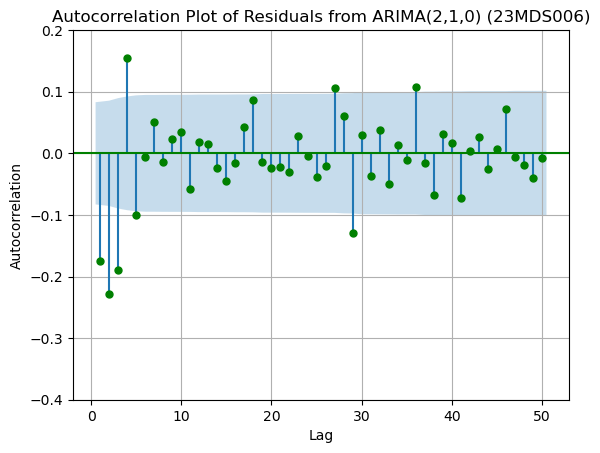

In [94]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50,color="green", zero=False)
plt.title('Autocorrelation Plot of Residuals from ARIMA(2,1,0) (23MDS006)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.ylim(-0.4, 0.2)
plt.show()

#### 3) 4-Plot of Residuals from ARIMA(0,1,1) Model

D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


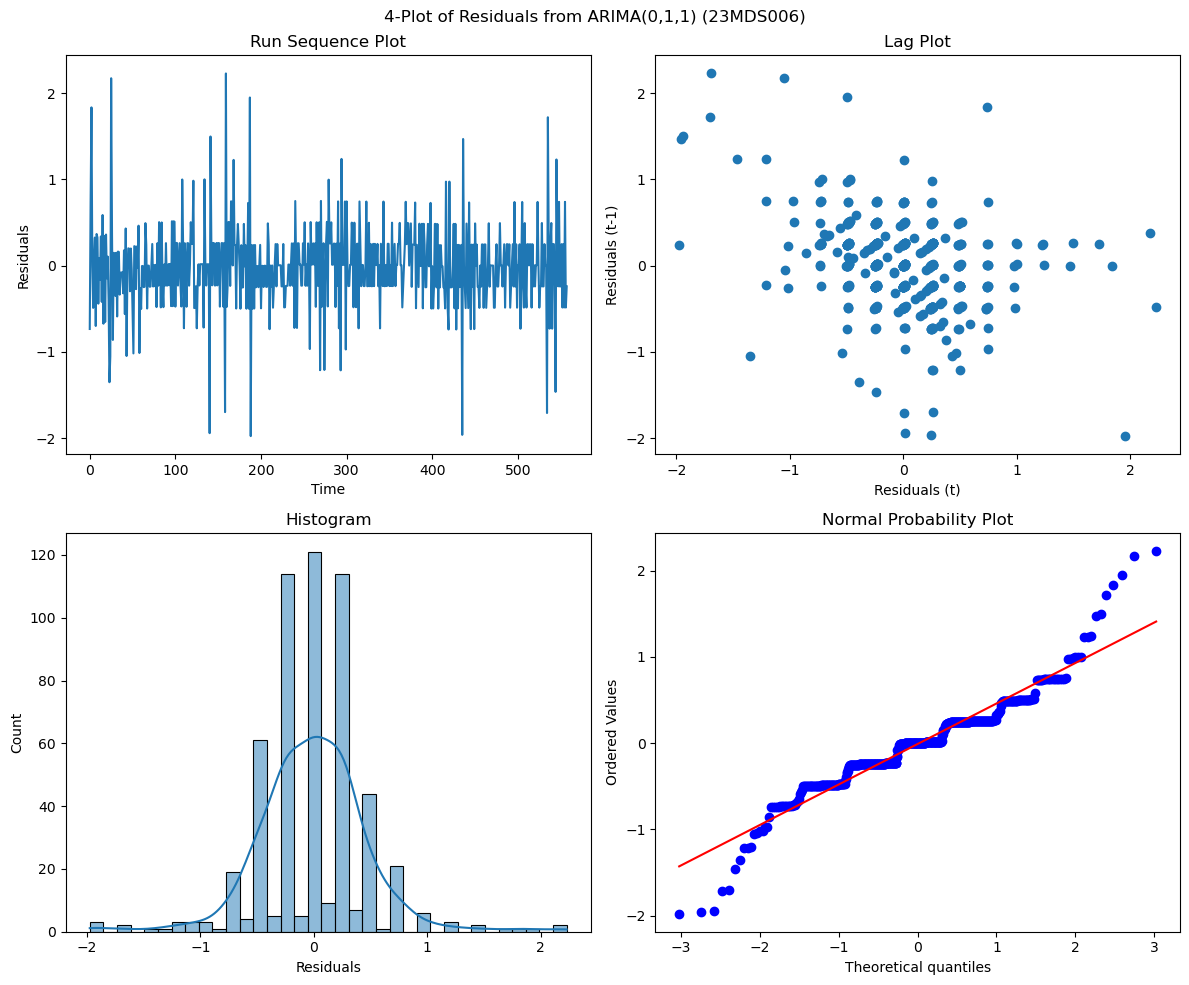

In [96]:
model = ARIMA(df1['data'], order=(0, 1, 1))
results = model.fit()
residuals = results.resid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('4-Plot of Residuals from ARIMA(0,1,1) (23MDS006)')

axs[0, 0].plot(residuals)
axs[0, 0].set_title('Run Sequence Plot')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Residuals')

pd.plotting.lag_plot(residuals, lag=1, ax=axs[0, 1])
axs[0, 1].set_title('Lag Plot')
axs[0, 1].set_xlabel('Residuals (t)')
axs[0, 1].set_ylabel('Residuals (t-1)')

sns.histplot(residuals, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram')
axs[1, 0].set_xlabel('Residuals')

stats.probplot(residuals, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Normal Probability Plot')

plt.tight_layout()
plt.show()

#### 4) Autocorrelation Plot of Residuals from ARIMA(0,1,1) Model

<Figure size 1000x600 with 0 Axes>

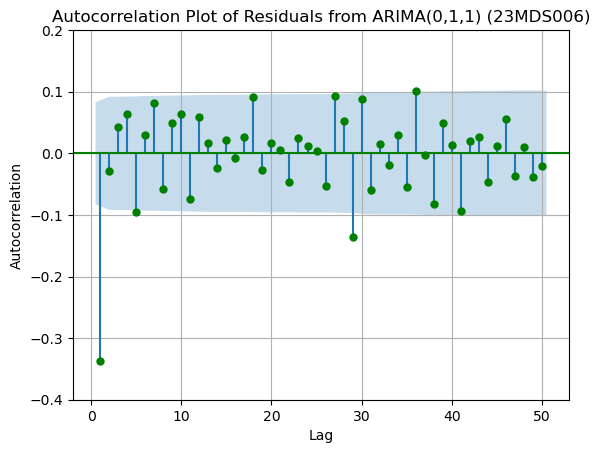

In [98]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50,color="green", zero=False)
plt.title('Autocorrelation Plot of Residuals from ARIMA(0,1,1) (23MDS006)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.ylim(-0.4, 0.2)
plt.show()